In [ ]:
# Put your code and comments in cells below here
# Add as many cells as you need

# Table of Contents:

1. **Merging CSV and JSON data**
   1.1 Products table
   1.2 Reviews table
   1.3 Users table

2. **Data cleaning**
   2.1 Missing values
   2.2 Filter dataframe to remove negative price values and outlier values

3. **Univariate analysis**
   3.1 Rating frequency
   3.2 Age frequency
   3.3 Brand frequency

4. **Bivariate analysis**
   4.1 Visualization of the number of bad and good ratings in each state in America
   4.2 Category vs discount
   4.3 Word cloud for bad and good reviews
   4.4 Reading a file from Kaggle website for the JCPenney project to show bad and good reviews word cloud


# **Import required libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Reading CSV files**

In [ ]:
# Reading product,review,user files
products=pd.read_csv("/content/products.csv")
reviews=pd.read_csv("/content/reviews.csv")
users=pd.read_csv("/content/users.csv")

In [ ]:
#Displaying the first two rows of products
products.head(2)

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000


In [ ]:
#Displaying the first two rows of reviews
reviews.head(2)

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...


In [ ]:
#Displaying the first two rows of users
users.head(2)

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts


#**Reading JSON files**


In [ ]:
#Read JSON files for JCPenney products and reviewers
import json

with open("/content/jcpenney_products.json", "r") as file:
    jp_products_json = [json.loads(line) for line in file]
with open("/content/jcpenney_reviewers.json", "r") as file:
    jp_review_json = [json.loads(line) for line in file]

#Convert JSON data to dataframes
jp_review_json=pd.DataFrame(jp_review_json)
jp_products_json=pd.DataFrame(jp_products_json)

In [ ]:
# Renaming columns in the JSON dataframe to match CSV for merging
jp_products_json_1 = jp_products_json
jp_products_json_1.rename(columns={'uniq_id': 'Uniq_id'}, inplace=True)



# **1.Merging CSV and JSON data**





# 1.1 Products table

In [ ]:
# Merge products dataframes on 'Uniq_id'
products_merged = pd.merge(jp_products_json_1, products, on=['Uniq_id'], how='inner')
products_merged.head(2)

,Uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2...",pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000


Droping the coloumns which we are not using in analysis and duplicate columns

In [ ]:
products_merged.drop(columns=['Price', 'Av_Score', 'SKU', 'Name', 'Description', 'Reviews', 'Bought With'], inplace=True)
products_merged.head(2)

,Uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8


# 1.2 Reviews Table

Taking the review coloumn from json prodcuts table and making a data frame

In [ ]:
json_reviews=jp_products_json[['Reviews','Uniq_id']]
json_reviews=pd.DataFrame(json_reviews)

# Extract 'User' and 'Review' from 'Reviews' column
json_reviews[['User', 'Review','Score']] = json_reviews['Reviews'].apply(lambda x: pd.Series([x[0]['User'], x[0]['Review'],x[0]['Score']]))

# Droping the original 'Reviews' column
json_reviews = json_reviews.drop('Reviews', axis=1)
json_reviews.rename(columns={'User':'Username'},inplace=True)
# Display the updated DataFrame
json_reviews.head(2)


,Uniq_id,Username,Review,Score
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,You never have to worry about the fit...Alfred...,2
1,93e5272c51d8cce02597e3ce67b7ad0a,tpcu2211,You never have to worry about the fit...Alfred...,1


In [ ]:
csv_reviews=reviews
csv_reviews.head(2)
print(len(csv_reviews),len(json_reviews))

39063 7982


As there is condirable amount of reviews in csv reviews in comparing to json reviews we are taking csv reviews as total reviews


In [ ]:
reviews=csv_reviews

#1.3 Users Table

Storing the users values of each file type in a variable

In [ ]:
csv_users=users
json_users=jp_review_json

In [ ]:

csv_users.head(3)

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho


In [ ]:
json_users.head(3)


,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,08.08.1950,Idaho,[]


In [ ]:
users_merged=pd.merge(csv_users,json_users,how='inner',on=['Username'])


# 1.4 Merging user and reviews table

In [ ]:
merged_review_user=pd.merge(csv_reviews,users_merged,how='inner',on='Username')

In [ ]:
merged_review_user.head(2)

,Uniq_id,Username,Score,Review,DOB_x,State_x,DOB_y,State_y,Reviewed,Age_Group
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,Bad,You never have to worry about the fit...Alfred...,43,American Samoa,31.07.1980,American Samoa,"[0144d2094668b42ae7c674915806f5f3, 7c27ffd820c...",Middle-Aged
1,cbe8d131628ec67e803c47d3dd6f2529,fsdv4141,Bad,"These are great shirts, looks great all day. W...",43,American Samoa,31.07.1980,American Samoa,"[0144d2094668b42ae7c674915806f5f3, 7c27ffd820c...",Middle-Aged


# 2.**Data cleaning**

2.1 Missing values

In [ ]:
# Performing some data cleaning and handling missing values in the merged dataframe
products_merged.replace('', pd.NA, inplace=True)
products_merged.isnull().sum()

Uniq_id                      0
sku                         67
name_title                   0
description                543
list_price                2166
sale_price                  18
category                   636
category_tree              636
average_product_rating       0
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
dtype: int64

Performing actions on three coloumns which have null values in the data.

As we have only 18 records for sales record we are removing the rows

In [ ]:
# Drop rows with missing values in 'sale_price'
products_merged = products_merged.dropna(subset=['sale_price'])

For the list price updating it with mean value but as the record have outliers we are going to remove the upper bound ,
Storing the column in another field to find the outliers and finding the upper bound


In [ ]:
prodcuts_merged_1=products_merged.dropna(subset=['list_price'])
prodcuts_merged_1['list_price'] = pd.to_numeric(prodcuts_merged_1['list_price'], errors='coerce')


Box plot to show the number of outliers

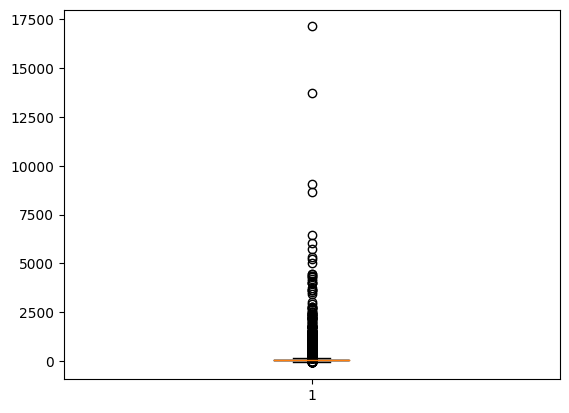

In [ ]:
plt.boxplot(prodcuts_merged_1['list_price'])

plt.show()

In [ ]:
# Identify and removing outliers in 'list_price' using IQR
Q1 = prodcuts_merged_1['list_price'].quantile(0.25)
Q3 = prodcuts_merged_1['list_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)


-28.779999999999987 156.5


#2.2 Filter dataframe to remove the negative price values and outlier values





In [ ]:
prodcuts_merged_1 = prodcuts_merged_1[(prodcuts_merged_1['list_price'] < upper_bound) & (prodcuts_merged_1['list_price'] > 0)]


plotting the bar plot again to see the price mean

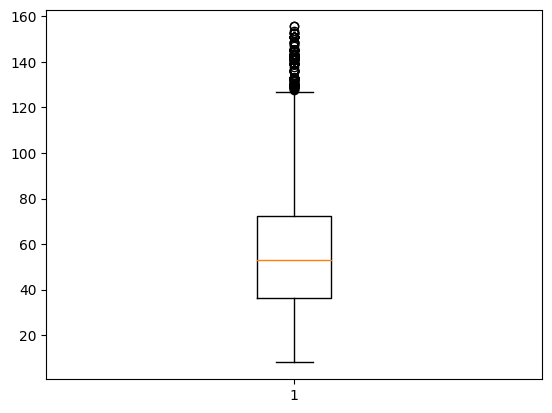

In [ ]:
plt.boxplot(prodcuts_merged_1['list_price'])

plt.show()

In [ ]:
prodcuts_merged_1.mean()

<ipython-input-25-4eae1e0ce2a0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  prodcuts_merged_1.mean()


list_price                58.727671
average_product_rating     2.989636
total_number_reviews       4.607199
dtype: float64

Updating the mean value in original products table

In [ ]:
mean_list_price = prodcuts_merged_1['list_price'].mean()

products_merged['list_price'] = products_merged['list_price'].fillna(mean_list_price)


# Categorical analysis

# **3.Univarient analysis**

#3.1 Rating frequency


In [ ]:
# Map numerical ratings to categories (worst, very bad, bad, average, good, very good)
rating_mapping = {0: 'worst', 1: 'Very Bad', 2: 'Bad', 3: 'Average', 4: 'Good', 5: 'Very Good'}
reviews['Score'] = reviews['Score'].map(rating_mapping)


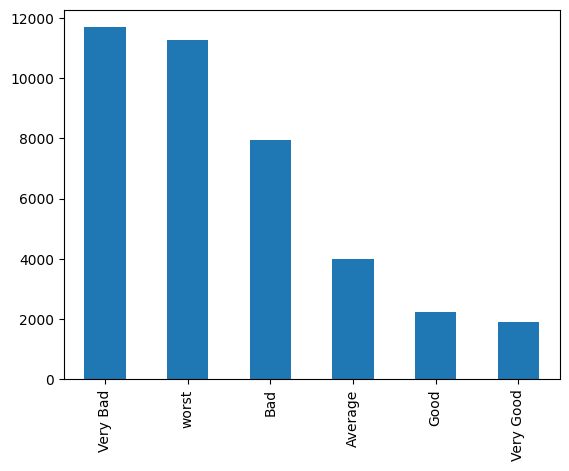

In [ ]:
# Creating a bar graph for rating frequency
rating_counts = pd.Series(reviews['Score']).value_counts()
rating_counts.plot(kind='bar')
plt.show()

It showing the data as most of the people rated less than 2 with rating 1 as the maximum count around 12000

# 3.2 Age frequency

In [ ]:
# Converting 'DOB' to datetime and calculate age
users_merged['DOB_x'] = pd.to_datetime(users_merged['DOB_x'])
from datetime import datetime
from datetime import date
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

users_merged['DOB_x']=users_merged['DOB_x'].apply(calculate_age)



In [ ]:
# Categorizing age into groups (Teenage, Young Adult, Adult, Middle-Aged, Senior)
def categorize_age(age):
    age_groups = {
        (16, 25): 'Teenage',
        (26, 30): 'Young Adult',
        (31, 40): 'Adult',
        (41, 60): 'Middle-Aged',
        (61, 100): 'Senior'
    }

    for age_range, group in age_groups.items():
        if age_range[0] <= age <= age_range[1]:
            return group

users_merged['Age_Group'] = users_merged['DOB_x'].apply(categorize_age)

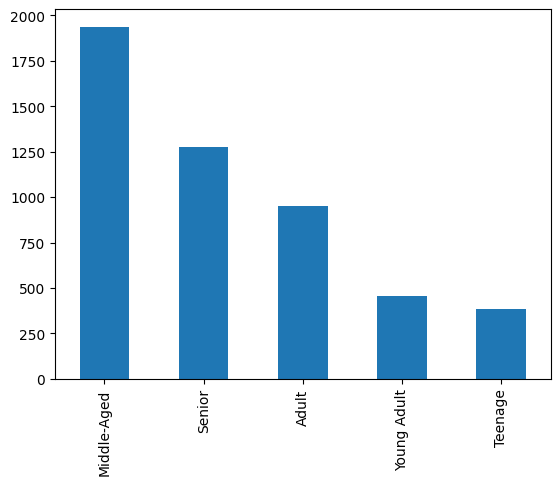

In [ ]:
# Creating a bar graph for age frequency
age_cat_value_count=pd.Series(users_merged['Age_Group']).value_counts()
age_cat_value_count.plot(kind='bar')
plt.show()

It provides that mosstly middle aged people have bought a lot of prodcuts and teenage people is the least


# 3.3 Brand frequency



Creating pie chart with to 19 brand percentages and remaining brands as other which have less than 1% counts

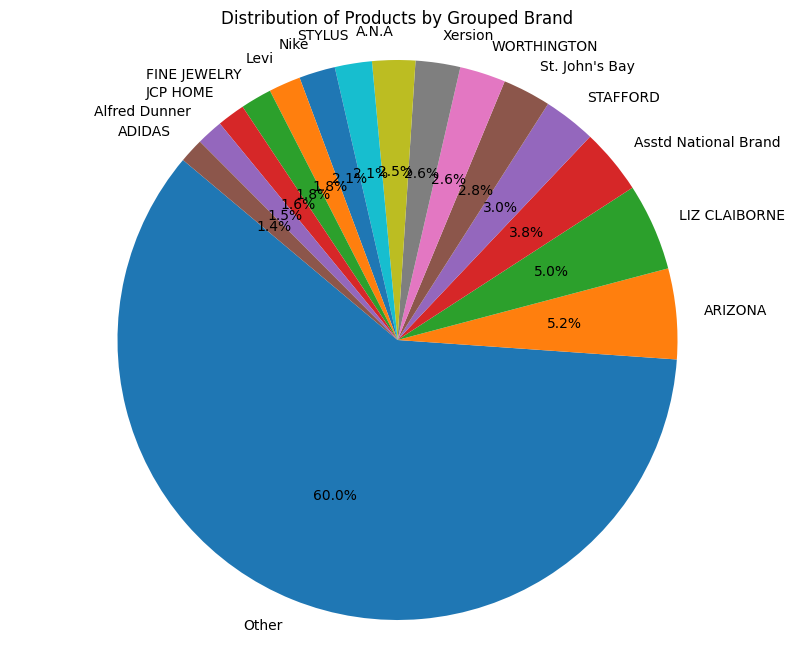

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating brand value count to find the frequency count
brand_counts = products_merged['brand'].value_counts()

# Getting the top 9 brands
top_brands = brand_counts.head(15).index

# Creating a new column 'grouped_brand' and mapping to 'Other' if not in top brands
products_merged['grouped_brand'] = products_merged['brand'].apply(lambda x: x if x in top_brands else 'Other')

# Counting the occurrences of each grouped brand
grouped_brand_counts = products_merged['grouped_brand'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(grouped_brand_counts, labels=grouped_brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Grouped Brand')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Showing the pie chart
plt.show()

# **4.Bivarient analysis**

#4.1 Visualisitation of the number of bad and good rating in each state in america

In [ ]:
#displaying first 2 rows of merged review and user table
merged_review_user.head(2)

,Uniq_id,Username,Score,Review,DOB_x,State_x,DOB_y,State_y,Reviewed,Age_Group
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,Bad,You never have to worry about the fit...Alfred...,43,American Samoa,31.07.1980,American Samoa,"[0144d2094668b42ae7c674915806f5f3, 7c27ffd820c...",Middle-Aged
1,cbe8d131628ec67e803c47d3dd6f2529,fsdv4141,Bad,"These are great shirts, looks great all day. W...",43,American Samoa,31.07.1980,American Samoa,"[0144d2094668b42ae7c674915806f5f3, 7c27ffd820c...",Middle-Aged


In [ ]:
# checking for null values
merged_review_user[['State_x', 'Score']].isnull().sum()

State_x    0
Score      0
dtype: int64

In [ ]:
# Creating a code for each state and mapping to it to show in a map
state_to_code_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'U.S. Virgin Islands': 'VI',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

merged_review_user['State Code'] = merged_review_user['State_x'].map(state_to_code_mapping)


Creating two maps , one for less rating and other for good rating to compare which state have given bad and good reviews




In [ ]:
import plotly.graph_objects as go
#For rating with 0 filtering it and grouping it by state code
state_review_counts=merged_review_user[merged_review_user['Score']=='Very Bad']
state_review_counts = state_review_counts.groupby('State Code').size().reset_index(name='Number_of_Reviews')
fig = go.Figure(data=go.Choropleth(
    locations=state_review_counts['State Code'],
    z=state_review_counts['Number_of_Reviews'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title="Number of Reviews",
))

fig.update_layout(
    geo=dict(
        scope='usa',
        projection_scale=7,
    ),
    title_text='Choropleth Map of Number of Reviews by State',
)

fig.show()

It shows south east and south states have given a most number of bad ratings

In [ ]:
import plotly.graph_objects as go
#For rating with 5 filtering it and grouping it by state code
state_review_counts=merged_review_user[merged_review_user['Score']=='Very Good']
state_review_counts = state_review_counts.groupby('State Code').size().reset_index(name='Number_of_Reviews')
fig = go.Figure(data=go.Choropleth(
    locations=state_review_counts['State Code'],
    z=state_review_counts['Number_of_Reviews'].astype(float),
    locationmode='USA-states',  # Corrected parameter
    colorscale='Reds',
    colorbar_title="Number of Reviews",
))

fig.update_layout(
    geo=dict(
        scope='usa',
        projection_scale=7,
    ),
    title_text='Choropleth Map of Number of Reviews by State',
)

fig.show()

It shows south west states have given the most positive reviews for the prodcuts


# 4.2 Category vs discount




Taking out the category from category tree column , then finding the discount with sale price and list price. Using that finding the categories which have ten highest  discount and ten least discount

In [ ]:
# Extracting the category from the category column
def transform_category_name(category_name):
    if pd.isna(category_name):
        return [None, None]
    else:
        splitted_category = category_name.split('|')
        return splitted_category[:2] + [None] * (2 - len(splitted_category))

# Apply the transformation to create new category columns
products_merged['category_main'], products_merged['category_sub1'] = zip(*products_merged['category_tree'].apply(transform_category_name))


In [ ]:
# Dropping the null value rows
prodcuts_merged = products_merged.dropna(subset=['category_sub1'])


In [ ]:
# Define a function to extract a representative value
def extract_representative(value):
    if isinstance(value, float):
        return value
    elif '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    else:
        return float(value)

# Apply the function to 'sale_price'
prodcuts_merged['sale_price'] = prodcuts_merged['sale_price'].apply(extract_representative).astype(float)

# Convert 'list_price' to float
prodcuts_merged['list_price'] = prodcuts_merged['list_price'].astype(float)


In [ ]:
#formula to calculate discount
prodcuts_merged["sale_discount"] =  100*prodcuts_merged['sale_price'].div(prodcuts_merged['list_price'])
prodcuts_merged["sale_discount"] = prodcuts_merged["sale_discount"].apply(lambda v: str(v)[:5]).astype(float)

In [ ]:
#Taking mean of discount for each category
category_mean_discount = prodcuts_merged.groupby('category_sub1')['sale_discount'].mean().reset_index()
category_mean_discount = category_mean_discount.rename(columns={'sale_discount': 'mean_discount'})

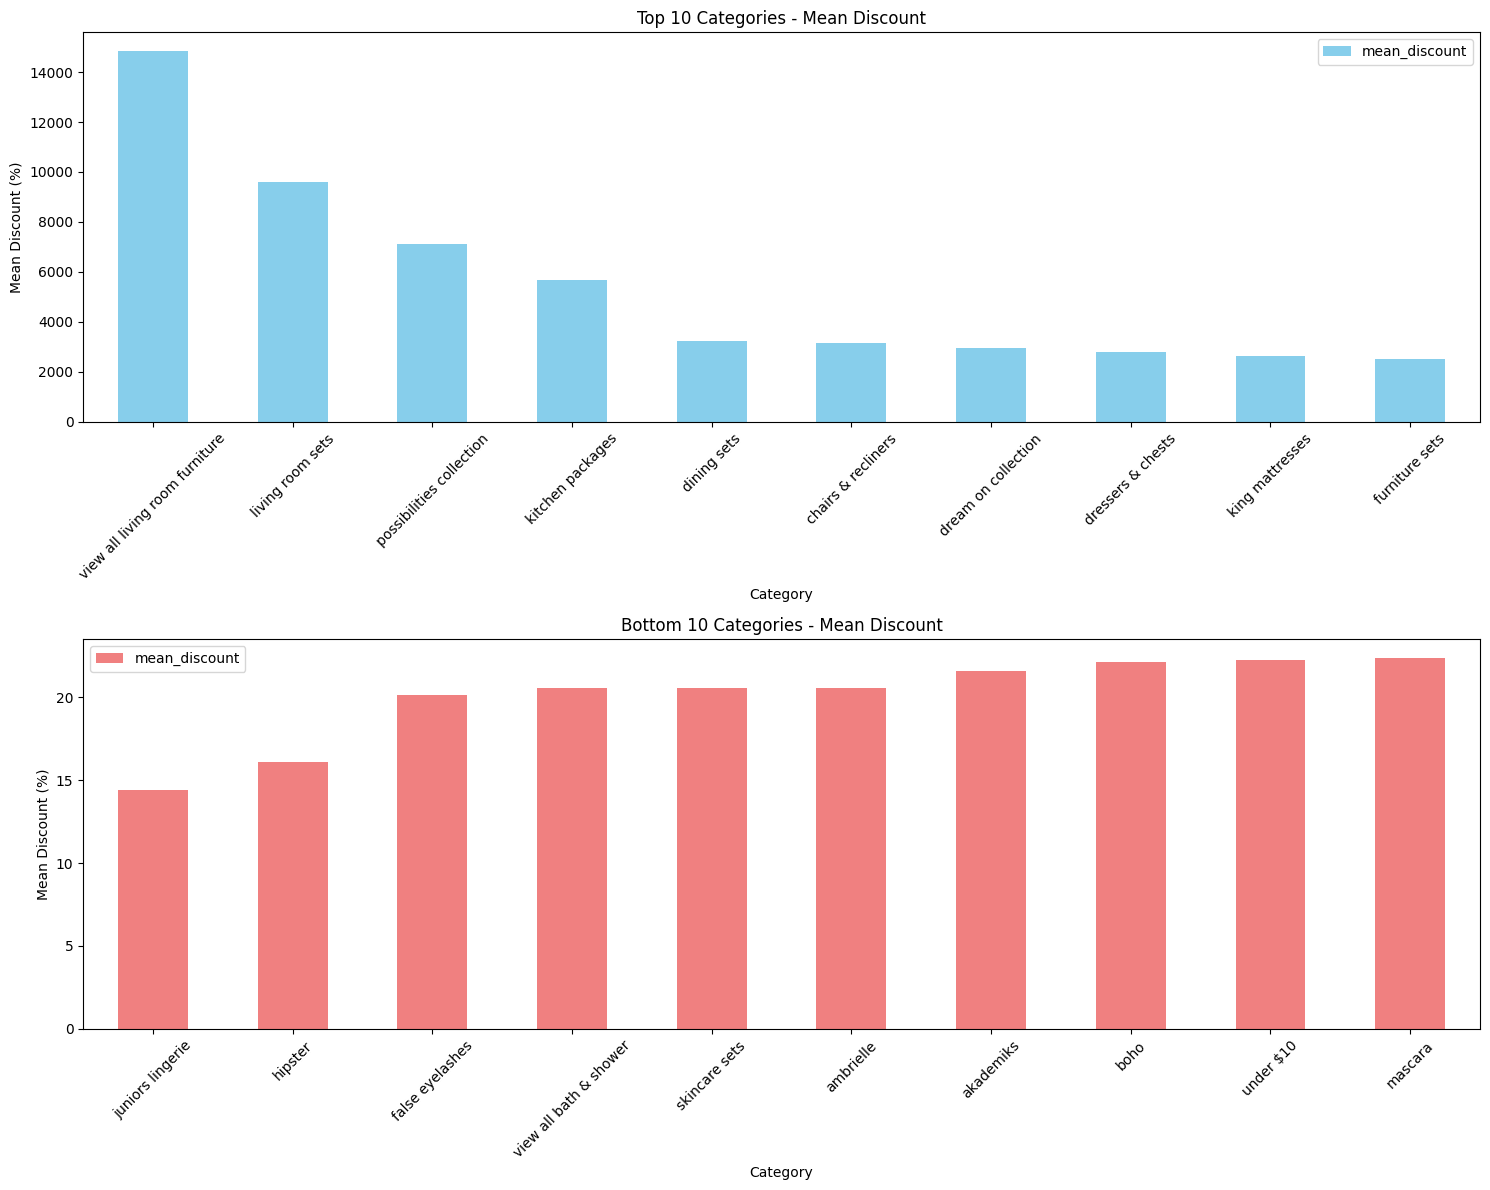

In [ ]:
# calculated top_10_category and bottom_10_category
top_10_category = category_mean_discount.sort_values(by='mean_discount', ascending=False).head(10)
bottom_10_category = category_mean_discount.sort_values(by='mean_discount').head(10)

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot for top 10 categories
top_10_category.plot(x='category_sub1', y='mean_discount', kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Categories - Mean Discount')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Mean Discount (%)')
axes[0].tick_params(axis='x', rotation=45)

# Plot for bottom 10 categories
bottom_10_category.plot(x='category_sub1', y='mean_discount', kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Bottom 10 Categories - Mean Discount')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Mean Discount (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 4.3 Word cloud for bad and good reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


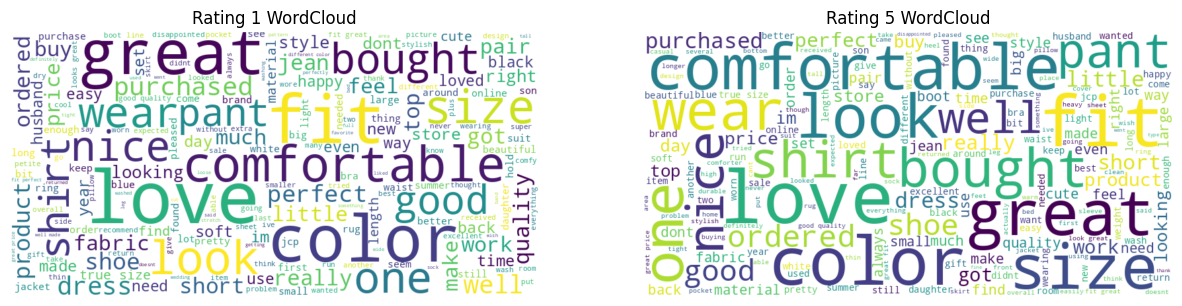

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
# choosing the rating with 1
bad_ratings_reviews = json_reviews[json_reviews['Score'] == 1]['Review']  # Assuming 0 corresponds to bad ratings

# Concatenating all bad reviews into a single string
all_bad_reviews = ' '.join(bad_ratings_reviews)

# Tokenize the words and remove stop words
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(all_bad_reviews)
filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words]

# Joining the filtered words into a single string
filtered_reviews_text = ' '.join(filtered_words)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_reviews_text)

# Plot the WordCloud
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Changed from (2, 1) to (1, 2)

# Plot for Rating 1
axes[0].imshow(wordcloud, interpolation="bilinear")
axes[0].set_title('Rating 1 WordCloud')
axes[0].axis('off')

# choosing the rating with 5
good_ratings_reviews = json_reviews[json_reviews['Score'] == 5]['Review']  # Assuming 1 corresponds to good ratings

# Concatenating all good reviews into a single string
all_good_reviews = ' '.join(good_ratings_reviews)

# Tokenize the words and remove stop words
word_tokens_good = word_tokenize(all_good_reviews)
filtered_words_good = [word.lower() for word in word_tokens_good if word.isalpha() and word.lower() not in stop_words]

# Joining the filtered words into a single string
filtered_reviews_text_good = ' '.join(filtered_words_good)

# Generate WordCloud for Rating 5
wordcloud_good = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_reviews_text_good)

# Plot for Rating 5
axes[1].imshow(wordcloud_good, interpolation="bilinear")
axes[1].set_title('Rating 5 WordCloud')
axes[1].axis('off')

plt.show()


As there is no significant diffrence in rating 1 and rating 5 comman words we will use external filr to compare it again

# 4.4 Reading a file from kaggle websited for jcpenny project to show bad and good reviews word cloud



In [ ]:
#Reading the ecommerce data
products_ecommerce=pd.read_csv("/content/ecommerce_jcpenny_prodcuts.csv")
#Reading the first two rows of the table
products_ecommerce.head(2)

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,4.7 out of 5,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,12,"{""review""=>[{""review_1""=>""You never have to wo..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,4.7 out of 5,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,12,"{""review""=>[{""review_1""=>""You never have to wo..."


In [ ]:
#extracting the rating from average_product_rating coloumn
products_ecommerce['numeric_rating'] = products_ecommerce['average_product_rating'].str.extract('(\d+\.\d+)').astype(float)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


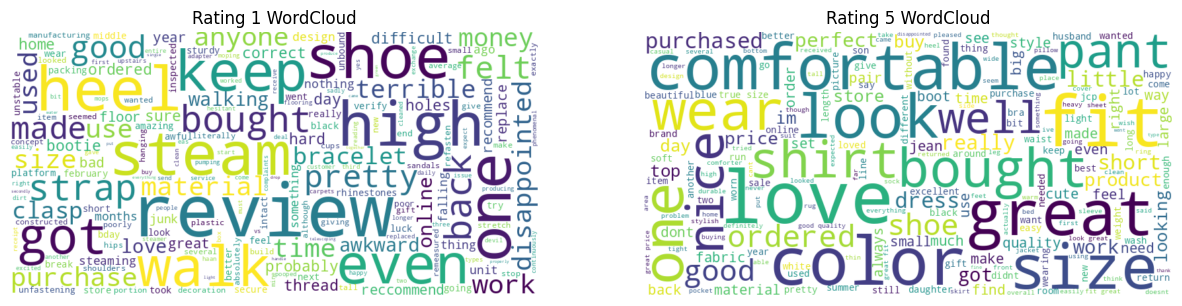

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
# choosing the rating with less than 2
bad_ratings_reviews = products_ecommerce[products_ecommerce['numeric_rating'] <2]['Reviews']
# Concatenating all bad reviews into a single string
all_bad_reviews = ' '.join(bad_ratings_reviews)

# Tokenize the words and remove stop words
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(all_bad_reviews)
filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words]

# Joining the filtered words into a single string
filtered_reviews_text = ' '.join(filtered_words)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_reviews_text)

# Plot the WordCloud
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Changed from (2, 1) to (1, 2)

# Plot for Rating 1
axes[0].imshow(wordcloud, interpolation="bilinear")
axes[0].set_title('Rating 1 WordCloud')
axes[0].axis('off')

# choosing the rating with 5
bad_ratings_reviews = products_ecommerce[products_ecommerce['numeric_rating'] > 4]['Reviews']

# Concatenating all good reviews into a single string
all_good_reviews = ' '.join(good_ratings_reviews)

# Tokenize the words and remove stop words
word_tokens_good = word_tokenize(all_good_reviews)
filtered_words_good = [word.lower() for word in word_tokens_good if word.isalpha() and word.lower() not in stop_words]

# Joining the filtered words into a single string
filtered_reviews_text_good = ' '.join(filtered_words_good)

# Generate WordCloud for Rating 5
wordcloud_good = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_reviews_text_good)

# Plot for Rating 5
axes[1].imshow(wordcloud_good, interpolation="bilinear")
axes[1].set_title('Rating 5 WordCloud')
axes[1].axis('off')

plt.show()


In this we can see in bad reviews predominent words are heel,strap,shoe,walk. So from this we can guess like most of bad reviews came for foot wears and in good we can see the words like pant,shirt,tie,top. so from this we can assume most good reviews came for clothes


